In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('household_power_consumption.txt',
                 delimiter=';',
                 low_memory=False,
                 on_bad_lines='warn')  # or 'skip' to skip bad lines


In [9]:
# Preprocessing
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [10]:
df.ffill(inplace=True)

# Verifying that there are no more missing values
print(df.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [11]:
# converting to csv file
df.to_csv('household_power_consumption.csv', index=False)

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None


In [13]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
missing_data_per_timestamp = df.isnull().sum(axis=1)

In [15]:
#Finding the timestamp with the most missing data
max_missing_index = missing_data_per_timestamp.idxmax()
timestamp_with_most_missing = df.loc[max_missing_index, 'Date']
missing_count = missing_data_per_timestamp[max_missing_index]

In [16]:
print(f"The timestamp with the most missing data is: {timestamp_with_most_missing}")
print(f"Number of missing values at this timestamp: {missing_count}")

The timestamp with the most missing data is: 16/12/2006
Number of missing values at this timestamp: 0


In [17]:
df.drop(columns=['Global_reactive_power'], inplace=True)
# reactive power is not required for load forecasting

In [18]:
df.head(5)

,Date,Time,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,235.68,15.8,0.0,1.0,17.0


In [19]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')

In [20]:
df.head(5)

,Date,Time,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [21]:
print(df['datetime'].head())
print(df['datetime'].dtypes)  # This should output 'datetime64[ns]'

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: datetime, dtype: datetime64[ns]
datetime64[ns]


In [22]:
df.shape

(2075259, 9)

In [23]:
print("Earliest date:", df['datetime'].min())
print("Latest date:", df['datetime'].max())

Earliest date: 2006-12-16 17:24:00
Latest date: 2010-11-26 21:02:00


In [24]:
# Ensure start_date and end_date are datetime objects
start_date = pd.to_datetime('2006-11-01')
end_date = pd.to_datetime('2007-02-01')

# Now filter the DataFrame
df_filtered = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]
print(df_filtered.shape)  # Check filtered rows


(66637, 9)


In [25]:
df_filtered.to_csv('New_household_power_consumption.csv', index=False)

In [26]:
df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Extract hourly data by selecting rows where the minutes and seconds are zero
hourly_data = df_filtered[df_filtered['datetime'].apply(lambda x: x.minute == 0 and x.second == 0)]

# Optionally, save the filtered hourly data to a new CSV file
hourly_data.to_csv('hourly_data.csv', index=False)

<ipython-input-26-abf2d508739e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'], format='%d-%m-%Y %H:%M:%S', errors='coerce')


In [27]:
hourly_data.head(5)

,Date,Time,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
36,16/12/2006,18:00:00,2.790,237.52,11.8,0.0,0.0,18.0,2006-12-16 18:00:00
96,16/12/2006,19:00:00,4.070,231.99,17.4,0.0,1.0,17.0,2006-12-16 19:00:00
156,16/12/2006,20:00:00,3.206,232.43,13.8,0.0,0.0,16.0,2006-12-16 20:00:00
216,16/12/2006,21:00:00,3.314,236.76,14.0,0.0,0.0,17.0,2006-12-16 21:00:00
276,16/12/2006,22:00:00,3.464,236.03,14.6,0.0,1.0,17.0,2006-12-16 22:00:00


In [28]:
print(hourly_data.tail(5))

            Date      Time  Global_active_power  Voltage  Global_intensity  \
66396  31/1/2007  20:00:00                1.508   238.28               6.2   
66456  31/1/2007  21:00:00                2.098   237.69               8.8   
66516  31/1/2007  22:00:00                3.434   236.93              14.4   
66576  31/1/2007  23:00:00                0.340   243.90               1.4   
66636   1/2/2007  00:00:00                0.326   243.15               1.4   

       Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
66396             0.0             0.0            17.0 2007-01-31 20:00:00  
66456             0.0             0.0             0.0 2007-01-31 21:00:00  
66516             0.0             0.0            17.0 2007-01-31 22:00:00  
66576             0.0             2.0             0.0 2007-01-31 23:00:00  
66636             0.0             0.0             0.0 2007-02-01 00:00:00  


In [29]:
hourly_data.shape[0]

1111

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
#Forward filling missing data if any
hourly_data_ffill = hourly_data['Global_active_power'].fillna(method='ffill')

#Seasonal decomposition
decomposition = seasonal_decompose(hourly_data_ffill, model='additive', period=24)

<ipython-input-31-eb1210875b88>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data_ffill = hourly_data['Global_active_power'].fillna(method='ffill')


In [32]:
hourly_data.shape

(1111, 9)

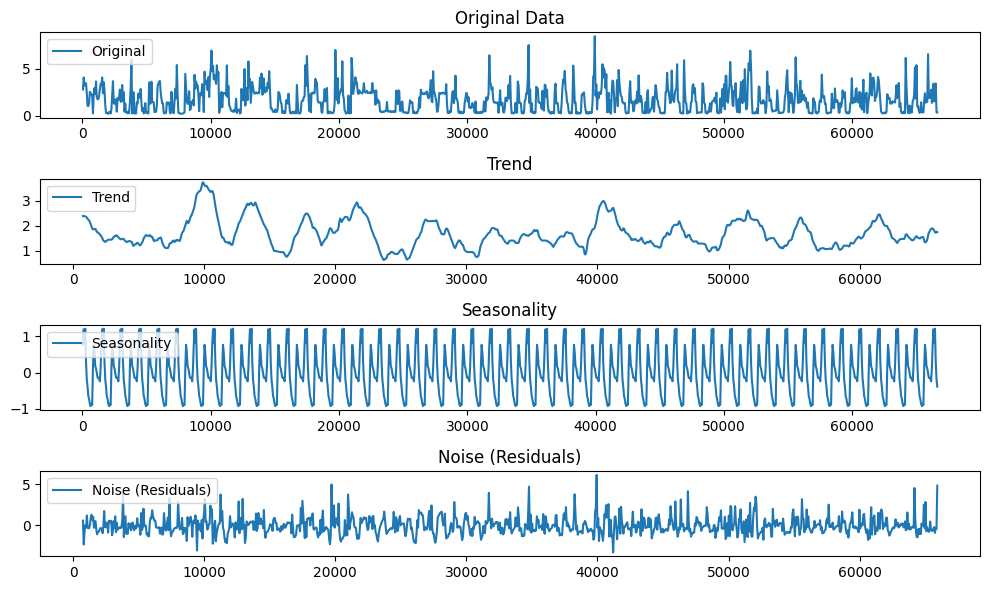

In [33]:
# Plotting the original data, trend, seasonal, and residual components
plt.figure(figsize=(10, 6))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Data')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid, label='Noise (Residuals)')
plt.legend(loc='upper left')
plt.title('Noise (Residuals)')

plt.tight_layout()
plt.show()

**LSTM, BiLSTM and CNN-BiLSTM Models**

In [34]:
import numpy as np
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import make_interp_spline
from matplotlib import rcParams

import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Bidirectional, Conv1D, MaxPooling1D, Flatten, RepeatVector

In [35]:
def adjust_data_size(hourly_data):
    num_rows = len(hourly_data)
    num_to_remove = num_rows % 24
    if num_to_remove != 0:
        hourly_data = hourly_data.iloc[:-num_to_remove]
    return hourly_data

# Apply the function and update the DataFrame
hourly_data = adjust_data_size(hourly_data)

In [36]:
hourly_data.shape

(1104, 9)

In [37]:
hourly_data.head(5)

,Date,Time,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
36,16/12/2006,18:00:00,2.790,237.52,11.8,0.0,0.0,18.0,2006-12-16 18:00:00
96,16/12/2006,19:00:00,4.070,231.99,17.4,0.0,1.0,17.0,2006-12-16 19:00:00
156,16/12/2006,20:00:00,3.206,232.43,13.8,0.0,0.0,16.0,2006-12-16 20:00:00
216,16/12/2006,21:00:00,3.314,236.76,14.0,0.0,0.0,17.0,2006-12-16 21:00:00
276,16/12/2006,22:00:00,3.464,236.03,14.6,0.0,1.0,17.0,2006-12-16 22:00:00


**Train, Test, Validation split**

In [38]:
def split_dataset(data):
    # Dropping datetime columns
    data = data.drop(columns=['datetime', 'Date', 'Time'])

    # Ensuring data length is a multiple of 24
    num_rows = len(data)
    num_to_remove = num_rows % 24
    if num_to_remove != 0:
        data = data.iloc[:-num_to_remove]

    num_samples = len(data) // 24

    # A traditional 60-20-20 split
    num_train = int(num_samples * 0.6)
    num_val = int(num_samples * 0.2)

    # Splitting into train, validation, and test sets
    train_data = data.iloc[:num_train * 24]
    val_data = data.iloc[num_train * 24:num_train * 24 + num_val * 24]
    test_data = data.iloc[num_train * 24 + num_val * 24:]

    # Reshaping into samples of daily data
    train = np.array(np.split(train_data, len(train_data) // 24))
    val = np.array(np.split(val_data, len(val_data) // 24))
    test = np.array(np.split(test_data, len(test_data) // 24))

    return train, val, test

In [39]:
numeric_columns = hourly_data.select_dtypes(include=[np.number]).columns
numeric_data = hourly_data[numeric_columns]

# Apply MinMaxScaler
trans = MinMaxScaler()
scaled_data = trans.fit_transform(numeric_data)
tran_scale = trans.scale_

train, val, test = split_dataset(hourly_data)
print('train size: ', train.shape)
print('valid size: ', val.shape)
print('test size : ', test.shape)

train size:  (27, 24, 6)
valid size:  (9, 24, 6)
test size :  (10, 24, 6)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [40]:
scaled_hourly_data = pd.DataFrame(scaled_data, columns=numeric_columns)

In [41]:
# To confirm if Min-Max Normalisation has been done
min_values = scaled_hourly_data.min()
max_values = scaled_hourly_data.max()

print('Minimum values after scaling:\n', min_values)
print('Maximum values after scaling:\n', max_values)

Minimum values after scaling:
 Global_active_power    0.0
Voltage                0.0
Global_intensity       0.0
Sub_metering_1         0.0
Sub_metering_2         0.0
Sub_metering_3         0.0
dtype: float64
Maximum values after scaling:
 Global_active_power    1.0
Voltage                1.0
Global_intensity       1.0
Sub_metering_1         1.0
Sub_metering_2         1.0
Sub_metering_3         1.0
dtype: float64


In [42]:
def evaluate_forecasts(actual, predicted):
    scores = []  # Stores the RMSE scores
    # Check if actual has 3 dimensions, if not, set num_features to 1
    num_features = actual.shape[2] if actual.ndim == 3 else 1  # Number of features

    # Calculating RMSE for each feature
    for i in range(num_features):
        # If actual is 2D, directly use it, otherwise use the sliced data
        actual_data = actual if actual.ndim == 2 else actual[:, :, i]
        # If predicted has 3 dimensions, use the sliced data, otherwise use it directly
        predicted_data = predicted[:, :, i] if predicted.ndim == 3 else predicted
        mse = mean_squared_error(actual_data, predicted_data)
        rmse = sqrt(mse)
        scores.append(rmse)

    # Calculating overall RMSE
    s = 0
    num_samples = actual.shape[0]
    # If actual is 2D, use 1 as the time steps, otherwise use the original shape
    num_time_steps = actual.shape[1] if actual.ndim == 2 else 1

    for row in range(num_samples):
        for col in range(num_time_steps):
            for feature in range(num_features):
                # If actual is 2D, access it directly, otherwise use the sliced data
                actual_value = actual[row, col] if actual.ndim == 2 else actual[row, col, feature]
                # If predicted has 3 dimensions, use the sliced data, otherwise use it directly
                predicted_value = predicted[row, col, feature] if predicted.ndim == 3 else predicted[row, col]
                s += (actual_value - predicted_value) ** 2

    overall_score = sqrt(s / (num_samples * num_time_steps * num_features))

    return overall_score, scores  # Summarize scores

# Summarize RMSE scores
def summarize_scores(name, overall_score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, overall_score, s_scores))

# Convert history into inputs (actual) and outputs (predicted) for training
def convert_train_val(train, n_input, n_out=24):
    # Flatten data: Assuming the last dimension is features
    data = train.reshape((train.shape[0] * train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0

    # Stepping over the entire history one time step at a time
    for i in range(len(data)):
        # Defining the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out

        # Ensuring we have enough data for this instance
        if out_end <= len(data):
            # Extracting input and output sequences for all features
            x_input = data[in_start:in_end, :]
            y_output = data[in_end:out_end, 0]
            X.append(x_input)
            y.append(y_output)

        # Moving along one time step of 1 hour
        in_start += 1

    # print("Shape of X:", np.array(X).shape)
    # print("Shape of y:", np.array(y).shape)

    return np.array(X), np.array(y)

# Making a forecast
def forecast(model, history, n_input):
    # Flatten data
    data = np.array(history)
    data = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
    # Retrieving last observations for input data
    input_x = data[-n_input:, :]
    # Reshaping into [1, n_input, n_features] for prediction
    input_x = input_x.reshape((1, n_input, data.shape[1]))
    # Forecasting the next time step
    yhat = model.predict(input_x, verbose=0)
    yhat = yhat[0]
    return yhat

# Building the BiLSTM model
def build_model_BiLSTM(train, val, n_input):
    # Creating training and validation sets
    train_x, train_y = convert_train_val(train, n_input)
    val_x, val_y = convert_train_val(val, n_input)

    #shapes of train_y and val_y
    print("Shape of train_y:", train_y.shape)
    print("Shape of val_y:", val_y.shape)

   # hyperparameters
    csv_logger = CSVLogger('BiLSTM_Model_Logger.log')
    verbose, epochs, batch_size = 1, 300, 32
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]

    # Reshaping output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))

    # Defining the model
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True), input_shape=(n_timesteps, n_features)))
    model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    print(model.summary())

    # Fitting network and storing mse loss in hist
    hist = model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[csv_logger], epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model, hist

# Evaluate the BiLSTM model
def evaluate_model_BiLSTM(train, val, test, n_input):
    model, hist = build_model_BiLSTM(train, val, n_input)

    # History is a list of hourly data
    history = [x for x in train]

    # Walk-forward validation over each time step in test set
    predictions = list()
    for i in range(len(test)):
        # Predict the next sequence using the trained model
        yhat_sequence = forecast(model, history, n_input)
        # Store the predictions
        predictions.append(yhat_sequence)
        # Get the real observation and add to history for predicting the next hour
        history.append(test[i, :])

    # Evaluating predictions
    predictions = np.array(predictions)
    overall_score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return overall_score, scores, hist, predictions

In [43]:
n_input = 24
BL_score, BL_scores, hist_BL, predictions_BL = evaluate_model_BiLSTM(train, val, test, n_input)

# Correcting the scaling operation to get single overall and average scores
BL_score = BL_score / tran_scale[0]  # Assuming the first element of tran_scale corresponds to the overall score
BL_scores = [score / tran_scale[i] for i, score in enumerate(BL_scores)]  # Applying scaling for individual scores
predictions_BL = predictions_BL / tran_scale[0]

# summarize rmse scores
summarize_scores('rmse', BL_score, BL_scores)  # Passing corrected values
print('Avg. score: ', BL_score)


Shape of train_y: (601, 24)
Shape of val_y: (169, 24)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 400)             │         331,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 24, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 24, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 24, 1)               │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 752,201 (2.87 MB)

 Trainable params: 752,201 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 634ms/step - loss: 19548.0430 - val_loss: 11587.6533
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 27160.8203 - val_loss: 62607.2148
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 62884.5742 - val_loss: 153006.0312
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 159967.2188 - val_loss: 454240.4375
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 322337.6250 - val_loss: 89132.0156
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 150642.8906 - val_loss: 139619.8594
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 104365.1016 - val_loss: 111080.5469
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 140186.9062 - val_loss: 128498.9922
Epoch 9/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 224605.4375 - val_loss: 181130.3438
Epoch 10/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 182731.5625 - val_loss: 157341.7812
Epoch 11/300
19/19 ━━━━━━━━━━━━━━━━━━━

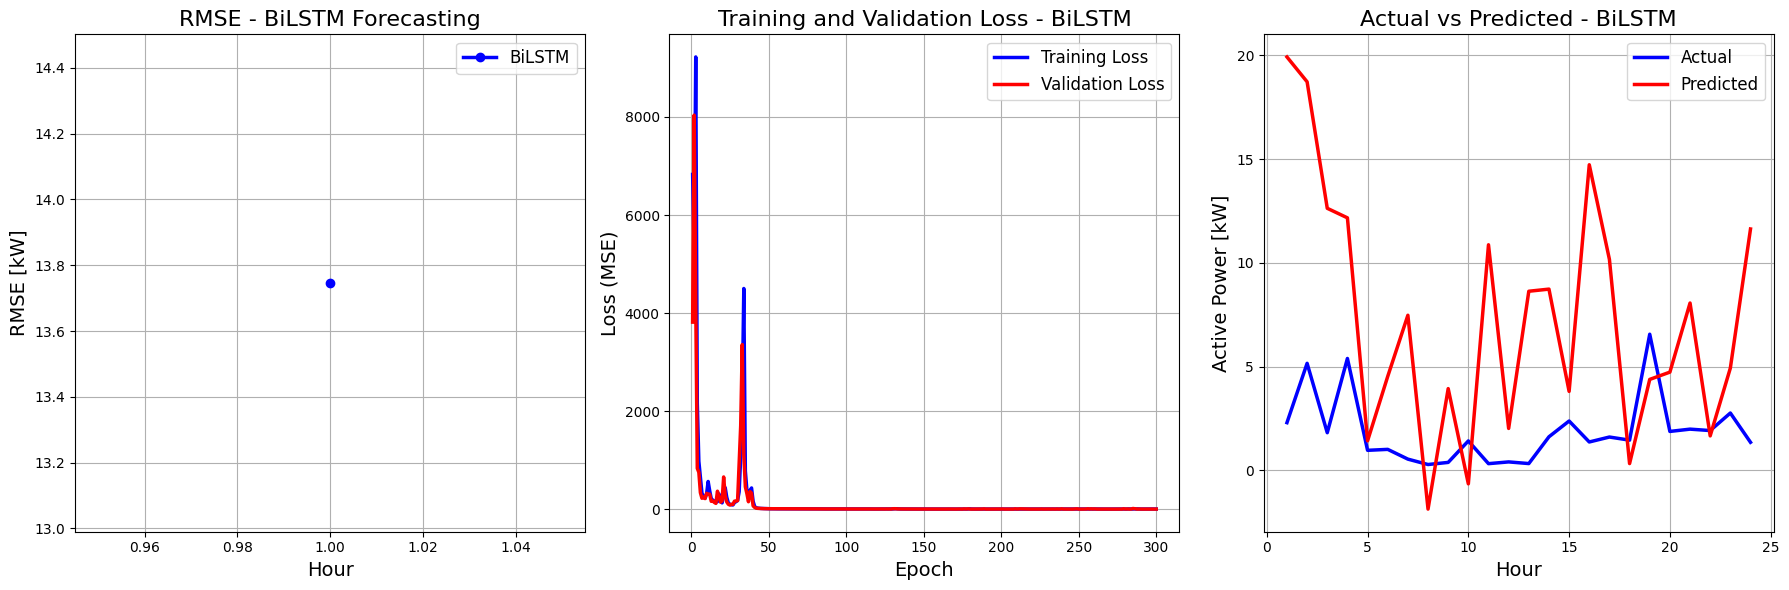

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract RMSE scores for each hour
hours = np.arange(1, len(BL_scores) + 1)

# Plotting setup
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 1. RMSE Scores Plot
axs[0].plot(hours, BL_scores, marker='o', label='BiLSTM', linewidth=2.5, color='blue')
axs[0].set_title('RMSE - BiLSTM Forecasting', fontsize=16)
axs[0].set_xlabel("Hour", fontsize=14)
axs[0].set_ylabel("RMSE [kW]", fontsize=14)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# 2. Training and Validation Loss Plot
# Access training and validation loss from history.history
loss = hist_BL.history['loss']  # Training loss
val_loss = hist_BL.history['val_loss']  # Validation loss
epochs = range(1, len(loss) + 1)

axs[1].plot(epochs, loss, 'b', label='Training Loss', linewidth=2.5)
axs[1].plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=2.5)
axs[1].set_title('Training and Validation Loss - BiLSTM', fontsize=16)
axs[1].set_xlabel("Epoch", fontsize=14)
axs[1].set_ylabel("Loss (MSE)", fontsize=14)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# 3. Actual vs Predicted Plot (Example Day)
test_day_index = 15  # Example day index (adjust as needed)

# Check if test_day_index is within bounds
if test_day_index >= test.shape[0]:
    test_day_index = test.shape[0] - 1  # Use the last day if index is out of bounds
    print(f"Warning: test_day_index was out of bounds. Using index {test_day_index} instead.")

# Define hours for the plot (24 hours)
hours_24 = np.arange(1, 25)  # Hours for a single day

# Plot actual and predicted values for a single day
axs[2].plot(hours_24, test[test_day_index, :, 0], 'b', label='Actual', linewidth=2.5)  # Actual values
axs[2].plot(hours_24, predictions_BL[test_day_index], 'r', label='Predicted', linewidth=2.5)  # Predicted values
axs[2].set_title('Actual vs Predicted - BiLSTM', fontsize=16)
axs[2].set_xlabel("Hour", fontsize=14)
axs[2].set_ylabel("Active Power [kW]", fontsize=14)
axs[2].grid(True)
axs[2].legend(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


LSTM Model

In [45]:
def evaluate_forecasts(actual, predicted):
    scores = []  # Stores the RMSE scores

    # Checking the number of dimensions of actual and predicted
    actual_dims = actual.ndim
    predicted_dims = predicted.ndim

    # To handle different dimensions
    if actual_dims == 3 and predicted_dims == 3:
        num_features = actual.shape[2]  # Number of features
    elif actual_dims == 2 and predicted_dims == 2:
        num_features = 1  # Assume 1 feature if both are 2D
        # Reshape to 3D for consistency
        actual = actual.reshape(actual.shape[0], actual.shape[1], 1)
        predicted = predicted.reshape(predicted.shape[0], predicted.shape[1], 1)
    else:
        raise ValueError("Dimension mismatch between actual and predicted. "
                         f"Actual has {actual_dims} dimensions, "
                         f"predicted has {predicted_dims} dimensions.")

    # Calculating RMSE for each feature
    for i in range(num_features):
        mse = mean_squared_error(actual[:, :, i], predicted[:, :, i])
        rmse = sqrt(mse)
        scores.append(rmse)

    # Calculating overall RMSE
    s = 0
    num_samples = actual.shape[0]
    num_time_steps = actual.shape[1]

    for row in range(num_samples):
        for col in range(num_time_steps):
            for feature in range(num_features):
                s += (actual[row, col, feature] - predicted[row, col, feature]) ** 2

    overall_score = sqrt(s / (num_samples * num_time_steps * num_features))
    return overall_score, scores  # Summarize scores

def summarize_scores(name, overall_score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, overall_score, s_scores))

def convert_train_val(data, n_input, n_out=24):
    # Flatten data
    data = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
    X, y = list(), list()
    in_start = 0

    for i in range(len(data)):
        in_end = in_start + n_input
        out_end = in_end + n_out

        if out_end <= len(data):
            x_input = data[in_start:in_end, :]
            y_output = data[in_end:out_end, 0]  # index based on target feature
            X.append(x_input)
            y.append(y_output)

        in_start += 1

    return np.array(X), np.array(y)

def build_and_train_lstm(train, val, n_input):
    train_x, train_y = convert_train_val(train, n_input)
    val_x, val_y = convert_train_val(val, n_input)

    print("Shape of train_y:", train_y.shape)
    print("Shape of val_y:", val_y.shape)

    csv_logger = CSVLogger('LSTM_Model_Logger.log')
    verbose, epochs, batch_size = 1, 300, 32
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]

    # Reshape output to [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))

    # Build LSTM Model
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True), input_shape=(n_timesteps, n_features)))
    model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
    model.add(TimeDistributed(Dense(1)))  # No of outputs as required
    model.compile(loss='mse', optimizer='adam')

    print(model.summary())

    # Fit model
    hist = model.fit(train_x, train_y, validation_data=(val_x, val_y),
                     callbacks=[csv_logger], epochs=epochs,
                     batch_size=batch_size, verbose=verbose)
    return model, hist


def forecast(model, history, n_input):
    # Convert history to a NumPy array
    history = np.array(history)
    # Reshape the history array if it has 3 dimensions
    if len(history.shape) == 3:
        data = history.reshape((history.shape[0] * history.shape[1], history.shape[2]))
    else:  # Handle the case where history might already be 2D
        data = history
    input_x = data[-n_input:, :].reshape((1, n_input, data.shape[1]))
    yhat = model.predict(input_x, verbose=0)  # Removed [0]
    # Make yhat 2-dimensional instead of 3-dimensional
    yhat = yhat.reshape(yhat.shape[1]) # Reshape if necessary
    return yhat

def evaluate_model(train, val, test, n_input):
    model, hist = build_and_train_lstm(train, val, n_input)

    history = [x for x in train]

    predictions = list()
    for i in range(len(test)):
        yhat_sequence = forecast(model, history, n_input)
        # Reshape yhat_sequence to (1, 24) before appending to predictions
        yhat_sequence = yhat_sequence.reshape(1, -1)
        predictions.append(yhat_sequence)
        history.append(test[i, :])

    # Concatenate predictions along the first axis to create a (10, 24) array
    predictions = np.concatenate(predictions, axis=0)
    overall_score, scores = evaluate_forecasts(test[:, :, 0], predictions)  # Change index based on your target feature
    return overall_score, scores, hist, predictions

LSTM Model Evaluation

In [47]:
n_input = 24  # Number of previous time steps to use for prediction
overall_score, scores, history, preds = evaluate_model(train, val, test, n_input)

# Summarize RMSE scores
summarize_scores('LSTM', overall_score, scores)

Shape of train_y: (601, 24)
Shape of val_y: (169, 24)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional)      │ (None, 24, 400)             │         331,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 24, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 24, 1)               │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 732,201 (2.79 MB)

 Trainable params: 732,201 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 575ms/step - loss: 50181.6406 - val_loss: 15621.6172
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 19338.3613 - val_loss: 23921.7070
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 82990.2812 - val_loss: 111245.4766
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 110875.5078 - val_loss: 549695.1250
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 327630.1562 - val_loss: 1251773.8750
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 442308.8750 - val_loss: 188361.7812
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 208211.5469 - val_loss: 647627.8750
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 914234.1875 - val_loss: 1800812.5000
Epoch 9/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2399269.5000 - val_loss: 775421.1250
Epoch 10/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 536002.5625 - val_loss: 274493.5625
Epoch 11/300
19/19 ━━━━━━━━━━━━━━━

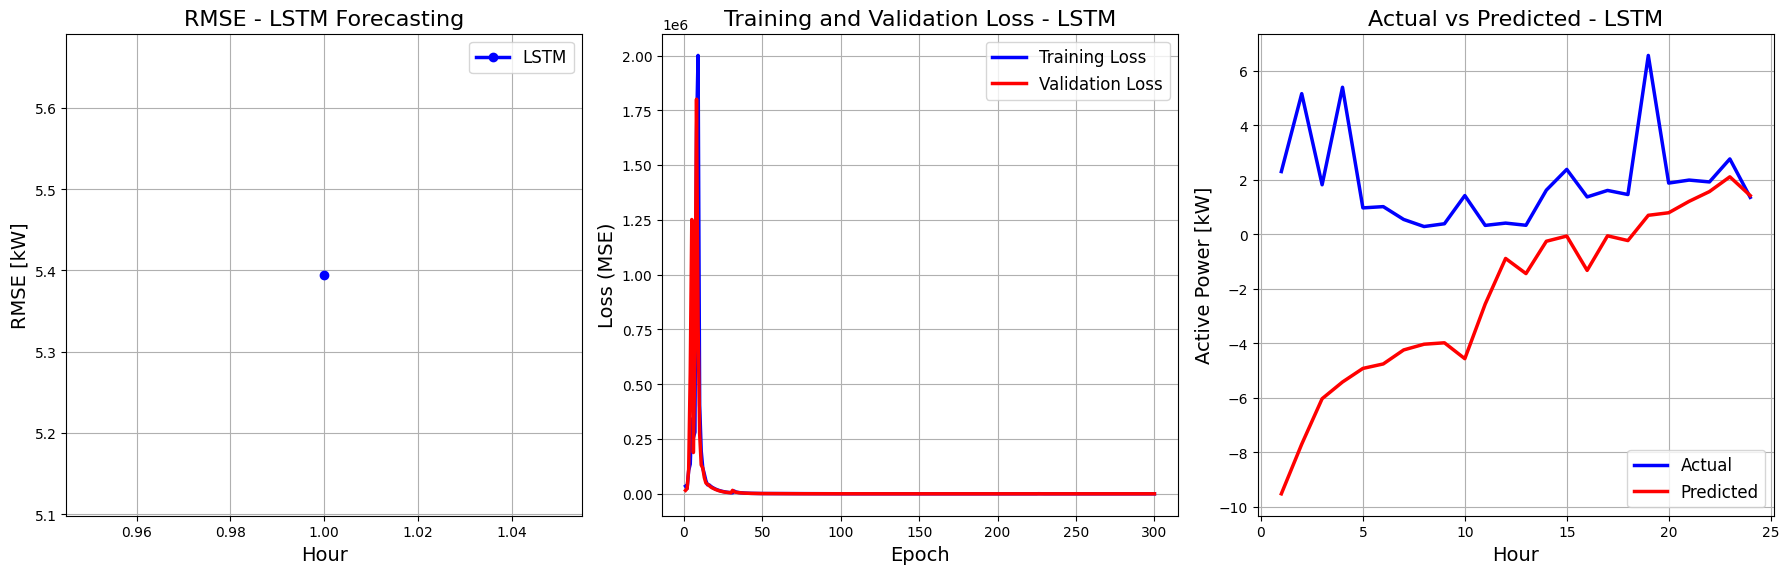

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the output variables from your model
LSTM_scores = scores  # RMSE scores from the evaluate_forecasts function
hist_LSTM = history  # Training history object from model.fit()
predictions_LSTM = preds  # Forecasted values from the LSTM model

# Extract RMSE scores for each hour
hours = np.arange(1, len(LSTM_scores) + 1)

# Plotting setup
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 1. RMSE Scores Plot
axs[0].plot(hours, LSTM_scores, marker='o', label='LSTM', linewidth=2.5, color='blue')
axs[0].set_title('RMSE - LSTM Forecasting', fontsize=16)
axs[0].set_xlabel("Hour", fontsize=14)
axs[0].set_ylabel("RMSE [kW]", fontsize=14)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# 2. Training and Validation Loss Plot
# Access training and validation loss from history.history
loss = hist_LSTM.history['loss']  # Training loss
val_loss = hist_LSTM.history['val_loss']  # Validation loss
epochs = range(1, len(loss) + 1)

axs[1].plot(epochs, loss, 'b', label='Training Loss', linewidth=2.5)
axs[1].plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=2.5)
axs[1].set_title('Training and Validation Loss - LSTM', fontsize=16)
axs[1].set_xlabel("Epoch", fontsize=14)
axs[1].set_ylabel("Loss (MSE)", fontsize=14)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# 3. Actual vs Predicted Plot (Example Day)
test_day_index = 15  # Example day index (adjust as needed)

# Check if test_day_index is within bounds
if test_day_index >= test.shape[0]:
    test_day_index = test.shape[0] - 1  # Use the last day if index is out of bounds
    print(f"Warning: test_day_index was out of bounds. Using index {test_day_index} instead.")

# Define hours for the plot (24 hours)
hours_24 = np.arange(1, 25)  # Hours for a single day

# Plot actual and predicted values for a single day
axs[2].plot(hours_24, test[test_day_index, :, 0], 'b', label='Actual', linewidth=2.5)  # Actual values
axs[2].plot(hours_24, predictions_LSTM[test_day_index], 'r', label='Predicted', linewidth=2.5)  # Predicted values
axs[2].set_title('Actual vs Predicted - LSTM', fontsize=16)
axs[2].set_xlabel("Hour", fontsize=14)
axs[2].set_ylabel("Active Power [kW]", fontsize=14)
axs[2].grid(True)
axs[2].legend(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


CNN-BiLSTM Model

In [ ]:
def evaluate_forecasts(actual, predicted):
    scores = []  # Stores the RMSE scores

    # Reshape actual to 2D if it's 3D
    if actual.ndim == 3:
        actual = actual.reshape(actual.shape[0], -1)  # Reshape to (samples, time steps * features)

    # Reshape predicted to 2D if it's 3D
    if predicted.ndim == 3:
        predicted = predicted.reshape(predicted.shape[0], -1)  # Reshape to (samples, time steps * features)

    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    scores.append(rmse)

    # Calculating overall RMSE (modified for 2D arrays)
    s = 0
    num_samples = actual.shape[0]
    num_time_steps = actual.shape[1]

    for row in range(num_samples):
        for col in range(num_time_steps):
            s += (actual[row, col] - predicted[row, col]) ** 2  # Modified for 2D

    overall_score = sqrt(s / (num_samples * num_time_steps))  # Modified for 2D
    return overall_score, scores  # Summarize scores

def summarize_scores(name, overall_score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, overall_score, s_scores))

def convert_train_val(data, n_input, n_out=24):
    # Flatten data
    data = data.reshape((data.shape[0] * data.shape[1], data.shape[2]))
    X, y = list(), list()
    in_start = 0

    for i in range(len(data)):
        in_end = in_start + n_input
        out_end = in_end + n_out

        if out_end <= len(data):
            x_input = data[in_start:in_end, :]
            y_output = data[in_end:out_end, 0]  #index based on your target feature
            X.append(x_input)
            y.append(y_output)

        in_start += 1

    return np.array(X), np.array(y)

def build_and_train_cnn_bilstm(train, val, n_input):
    train_x, train_y = convert_train_val(train, n_input)
    val_x, val_y = convert_train_val(val, n_input)

    print("Shape of train_y:", train_y.shape)
    print("Shape of val_y:", val_y.shape)

    csv_logger = CSVLogger('CNN_BiLSTM_Model_Logger.log')
    verbose, epochs, batch_size = 1, 300, 32  # Adjust epochs and batch_size as needed
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]

    # Reshape output to [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))

    # Build CNN-BiLSTM Model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features), padding='same')) # Add padding='same' to the Conv1D layer
    #model.add(MaxPooling1D(pool_size=2)) # Remove or adjust MaxPooling1D
    model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
    model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True)))
    model.add(TimeDistributed(Dense(1)))  # Change 1 to the number of outputs if needed
    model.compile(loss='mse', optimizer='adam')

    print(model.summary())

    # Fit model
    hist = model.fit(train_x, train_y, validation_data=(val_x, val_y),
                     callbacks=[csv_logger], epochs=epochs,
                     batch_size=batch_size, verbose=verbose)
    return model, hist

def forecast(model, history, n_input):
    data = np.array(history).reshape((history.shape[0] * history.shape[1], history.shape[2]))
    input_x = data[-n_input:, :].reshape((1, n_input, data.shape[1]))
    yhat = model.predict(input_x, verbose=0)[0]
    return yhat

def evaluate_model(train, val, test, n_input):
    model, hist = build_and_train_cnn_bilstm(train, val, n_input)

    # Convert history to a NumPy array
    history = np.array(train)  # Change here

    predictions = list()
    for i in range(len(test)):
        yhat_sequence = forecast(model, history, n_input)
        predictions.append(yhat_sequence)
        # Append to history as a NumPy array
        history = np.vstack((history, test[i, :][None, ...]))  # Correctly append to NumPy array

    predictions = np.array(predictions)
    overall_score, scores = evaluate_forecasts(test[:, :, 0], predictions)  # Change index based on your target feature
    return overall_score, scores, hist, predictions

CNN-BiLSTM Model Evaluation

In [ ]:
n_input = 24  # Number of previous time steps to use for prediction
# Assuming `train`, `val`, and `test` are your training, validation, and test datasets respectively
CNNBiLSTM_overallscore, CNNBiLSTM_scores, CNNBiLSTM_history, CNNBiLSTM_preds = evaluate_model(train, val, test, n_input)

# Summarize RMSE scores
summarize_scores('CNN-BiLSTM', CNNBiLSTM_overallscore, CNNBiLSTM_scores)


Shape of train_y: (601, 24)
Shape of val_y: (169, 24)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 24, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 24, 200)             │         132,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 24, 100)             │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 24, 1)               │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,717 (912.96 KB)

 Trainable params: 233,717 (912.96 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - loss: 5714.3857 - val_loss: 1129.0658
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1345.1616 - val_loss: 2936.6353
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2825.0630 - val_loss: 3091.2197
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2661.0227 - val_loss: 955.5596
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 868.5552 - val_loss: 1071.9923
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 955.6301 - val_loss: 478.4547
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 851.3116 - val_loss: 1988.7123
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1885.1725 - val_loss: 211.7855
Epoch 9/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 215.9400 - val_loss: 194.5351
Epoch 10/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 182.2326 - val_loss: 325.5542
Epoch 11/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 278.6262 - val_loss: 

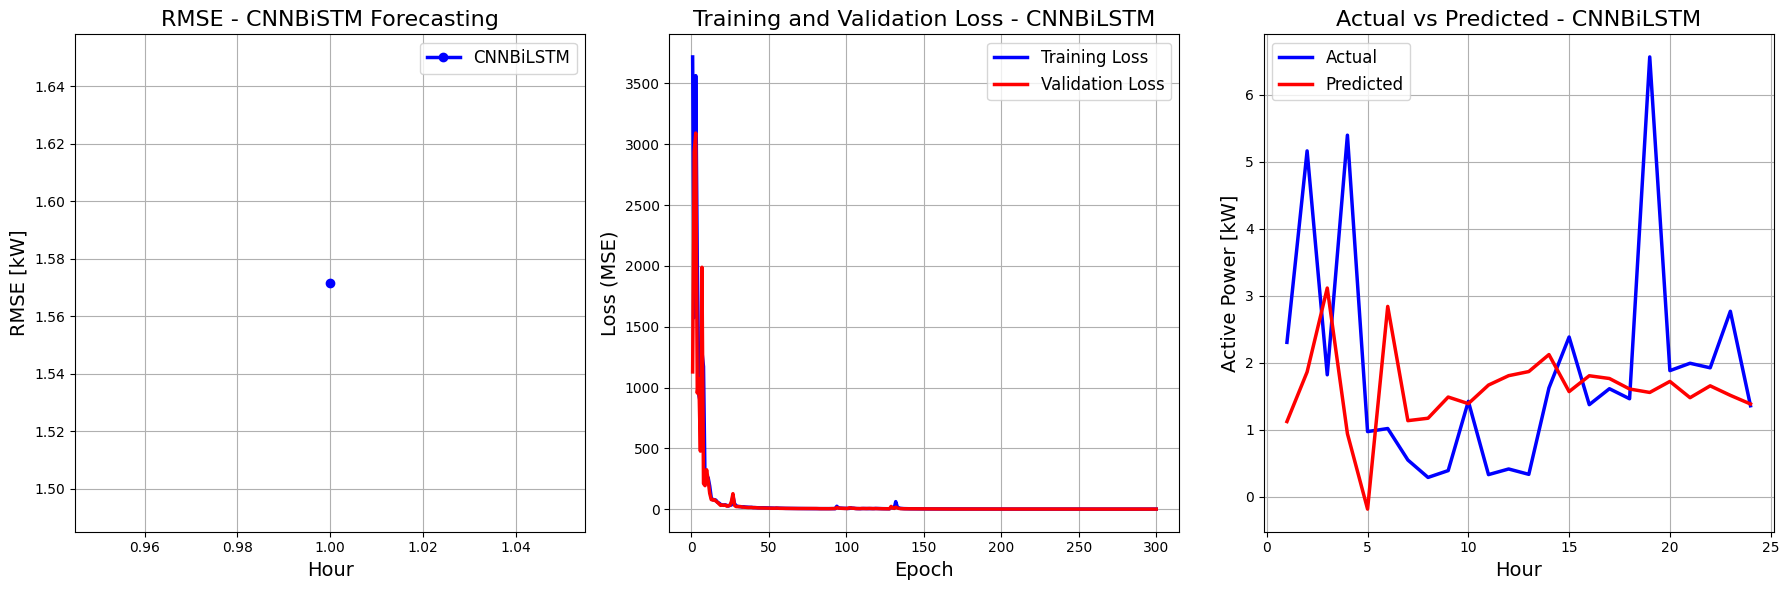

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract RMSE scores for each hour
hours_CNNBiLSTM = np.arange(1, len(CNNBiLSTM_scores) + 1)

# Plotting setup
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 1. RMSE Scores Plot
axs[0].plot(hours, CNNBiLSTM_scores, marker='o', label='CNNBiLSTM', linewidth=2.5, color='blue')
axs[0].set_title('RMSE - CNNBiSTM Forecasting', fontsize=16)
axs[0].set_xlabel("Hour", fontsize=14)
axs[0].set_ylabel("RMSE [kW]", fontsize=14)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# 2. Training and Validation Loss Plot
# Access training and validation loss from history.history
loss = CNNBiLSTM_history.history['loss']  # Training loss
val_loss = CNNBiLSTM_history.history['val_loss']  # Validation loss
epochs = range(1, len(loss) + 1)

axs[1].plot(epochs, loss, 'b', label='Training Loss', linewidth=2.5)
axs[1].plot(epochs, val_loss, 'r', label='Validation Loss', linewidth=2.5)
axs[1].set_title('Training and Validation Loss - CNNBiLSTM', fontsize=16)
axs[1].set_xlabel("Epoch", fontsize=14)
axs[1].set_ylabel("Loss (MSE)", fontsize=14)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# 3. Actual vs Predicted Plot (Example Day)
test_day_index = 15  # Example day index (adjust as needed)

# Check if test_day_index is within bounds
if test_day_index >= test.shape[0]:
    test_day_index = test.shape[0] - 1  # Use the last day if index is out of bounds
    print(f"Warning: test_day_index was out of bounds. Using index {test_day_index} instead.")

# Define hours for the plot (24 hours)
hours_24 = np.arange(1, 25)  # Hours for a single day

# Plot actual and predicted values for a single day
axs[2].plot(hours_24, test[test_day_index, :, 0], 'b', label='Actual', linewidth=2.5)  # Actual values
axs[2].plot(hours_24, CNNBiLSTM_preds[test_day_index], 'r', label='Predicted', linewidth=2.5)  # Predicted values
axs[2].set_title('Actual vs Predicted - CNNBiLSTM', fontsize=16)
axs[2].set_xlabel("Hour", fontsize=14)
axs[2].set_ylabel("Active Power [kW]", fontsize=14)
axs[2].grid(True)
axs[2].legend(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

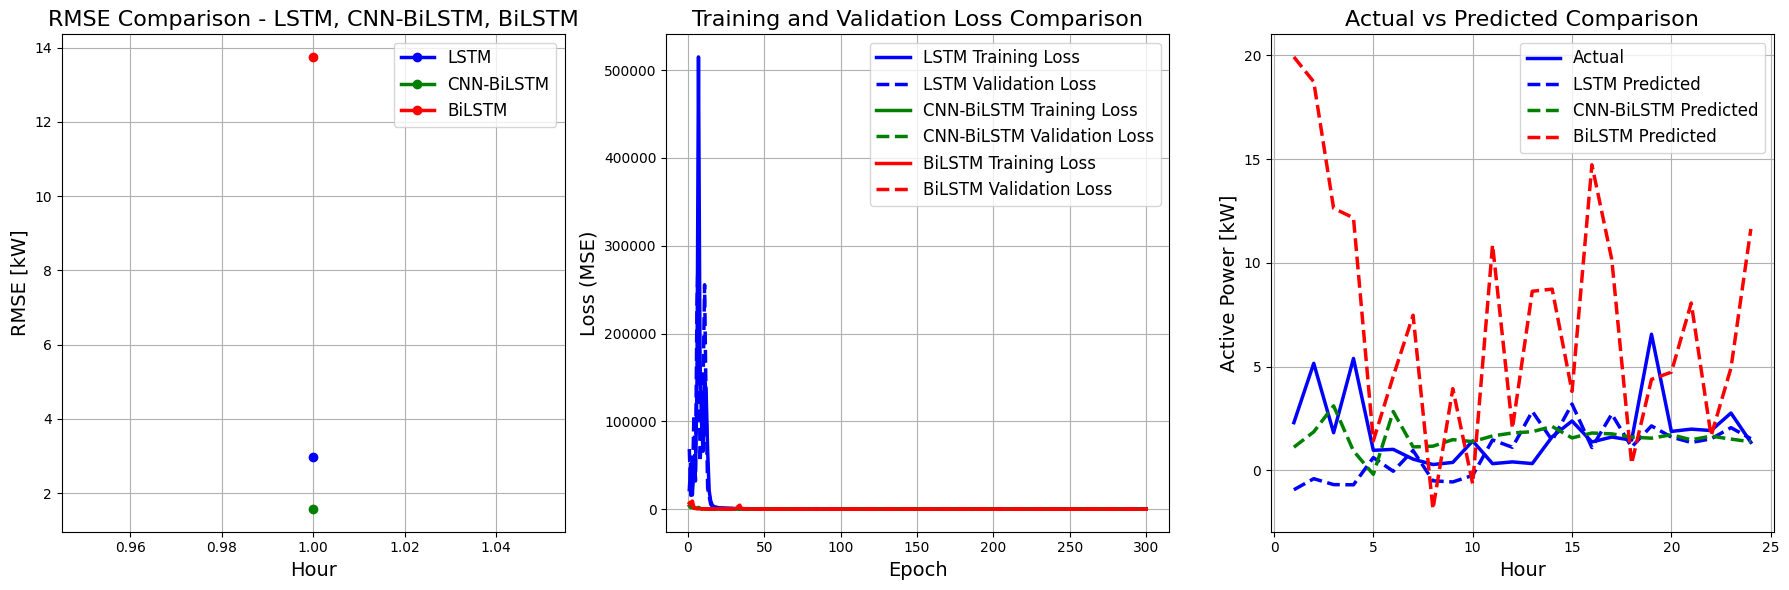

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming scores contains RMSE for each model
# Example: scores = {'LSTM': [values], 'CNN-BiLSTM': [values], 'BiLSTM': [values]}

scores = {'LSTM': LSTM_scores, 'CNN-BiLSTM': CNNBiLSTM_scores, 'BiLSTM': BL_scores}

# Define hours or other evaluation points (e.g., epochs or time steps)
# Assuming LSTM_scores, CNNBiLSTM_scores, and BiLSTM_scores have the same length
# You can adjust this based on your actual data
hours = np.arange(1, len(scores['LSTM']) + 1)
# Create subplots for comparison
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 1. RMSE Comparison for LSTM, CNN-BiLSTM, and BiLSTM
axs[0].plot(hours, scores['LSTM'], marker='o', label='LSTM', linewidth=2.5, color='blue')
axs[0].plot(hours, scores['CNN-BiLSTM'], marker='o', label='CNN-BiLSTM', linewidth=2.5, color='green')
axs[0].plot(hours, scores['BiLSTM'], marker='o', label='BiLSTM', linewidth=2.5, color='red')
axs[0].set_title('RMSE Comparison - LSTM, CNN-BiLSTM, BiLSTM', fontsize=16)
axs[0].set_xlabel("Hour", fontsize=14)
axs[0].set_ylabel("RMSE [kW]", fontsize=14)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# 2. Training and Validation Loss Comparison for LSTM, CNN-BiLSTM, and BiLSTM
lstm_loss = history.history['loss']
lstm_val_loss = history.history['val_loss']

bilstm_loss = hist_BL.history['loss']
bilstm_val_loss = hist_BL.history['val_loss']

cnbilstm_loss = CNNBiLSTM_history.history['loss']
cnbilstm_val_loss = CNNBiLSTM_history.history['val_loss']

epochs = range(1, len(lstm_loss) + 1)

# Plotting the loss comparison
axs[1].plot(epochs, lstm_loss, 'b', label='LSTM Training Loss', linewidth=2.5)
axs[1].plot(epochs, lstm_val_loss, 'b--', label='LSTM Validation Loss', linewidth=2.5)
axs[1].plot(epochs, cnbilstm_loss, 'g', label='CNN-BiLSTM Training Loss', linewidth=2.5)
axs[1].plot(epochs, cnbilstm_val_loss, 'g--', label='CNN-BiLSTM Validation Loss', linewidth=2.5)
axs[1].plot(epochs, bilstm_loss, 'r', label='BiLSTM Training Loss', linewidth=2.5)
axs[1].plot(epochs, bilstm_val_loss, 'r--', label='BiLSTM Validation Loss', linewidth=2.5)

axs[1].set_title('Training and Validation Loss Comparison', fontsize=16)
axs[1].set_xlabel("Epoch", fontsize=14)
axs[1].set_ylabel("Loss (MSE)", fontsize=14)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# 3. Actual vs Predicted Plot for a Random Example (Adjust test_day_index as needed)
test_day_index = 15  # Example day index (adjust as needed)

# Check if test_day_index is within bounds
if test_day_index >= test.shape[0]:
    test_day_index = test.shape[0] - 1  # Use the last day if index is out of bounds
    print(f"Warning: test_day_index was out of bounds. Using index {test_day_index} instead.")

# Define hours for the plot (24 hours)
hours_24 = np.arange(1, 25)  # Hours for a single day

# Plot actual and predicted values for a single day for all models
axs[2].plot(hours_24, test[test_day_index, :, 0], 'b', label='Actual', linewidth=2.5)  # Actual values
axs[2].plot(hours_24, preds[test_day_index], 'b--', label='LSTM Predicted', linewidth=2.5)
axs[2].plot(hours_24, CNNBiLSTM_preds[test_day_index], 'g--', label='CNN-BiLSTM Predicted', linewidth=2.5)
axs[2].plot(hours_24, predictions_BL[test_day_index], 'r--', label='BiLSTM Predicted', linewidth=2.5)
axs[2].set_title('Actual vs Predicted Comparison', fontsize=16)
axs[2].set_xlabel("Hour", fontsize=14)
axs[2].set_ylabel("Active Power [kW]", fontsize=14)
axs[2].grid(True)
axs[2].legend(fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()


**BiLSTM with Bayesian Optimisation**

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.callbacks import CSVLogger
import numpy as np

In [ ]:
# Evaluate forecasts
def evaluate_forecasts(actual, predicted):
    scores = []
    num_features = actual.shape[2] if actual.ndim == 3 else 1
    for i in range(num_features):
        actual_data = actual if actual.ndim == 2 else actual[:, :, i]
        predicted_data = predicted[:, :, i] if predicted.ndim == 3 else predicted
        mse = mean_squared_error(actual_data, predicted_data)
        rmse = sqrt(mse)
        scores.append(rmse)
    s = 0
    num_samples = actual.shape[0]
    num_time_steps = actual.shape[1] if actual.ndim == 3 else 1
    for row in range(num_samples):
        for col in range(num_time_steps):
            for feature in range(num_features):
                actual_value = actual[row, col] if actual.ndim == 2 else actual[row, col, feature]
                predicted_value = predicted[row, col, feature] if predicted.ndim == 3 else predicted[row, col]
                s += (actual_value - predicted_value) ** 2
    overall_score = sqrt(s / (num_samples * num_time_steps * num_features))
    return overall_score, scores

# Summarize scores
def summarize_scores(name, overall_score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, overall_score, s_scores))

# Convert history to inputs and outputs
def convert_train_val(train, n_input, n_out=24):
    data = train.reshape((train.shape[0] * train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    for i in range(len(data)):
        in_end = in_start + n_input
        out_end = in_end + n_out
        if out_end <= len(data):
            x_input = data[in_start:in_end, :]
            y_output = data[in_end:out_end, 0]
            X.append(x_input)
            y.append(y_output)
        in_start += 1
    return np.array(X), np.array(y)

# Make a forecast
def forecast(model, history, n_input):
    data = np.array(history).reshape((-1, history.shape[2]))
    input_x = data[-n_input:, :].reshape((1, n_input, data.shape[1]))
    yhat = model.predict(input_x, verbose=0)
    return yhat[0]

# Objective function for Bayesian Optimization
def optimize_bilstm(epochs, batch_size):
    n_input = 24
    model = build_model_BiLSTM(train, val, n_input, epochs, batch_size)
    val_x, val_y = convert_train_val(val, n_input)
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))
    predictions = model.predict(val_x)
    mse = mean_squared_error(val_y.reshape(-1, 1), predictions.reshape(-1, 1))
    return -mse  # Minimizing MSE

# Bayesian Optimization
pbounds = {
    'epochs': (50, 300),
    'batch_size': (16, 64)
}
optimizer = BayesianOptimization(
    f=optimize_bilstm,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)
optimizer.maximize(init_points=5, n_iter=20)

best_params = optimizer.max
print("Best parameters:", best_params)

|   iter    |  target   | batch_... |  epochs   |
-------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 650ms/step
| 1         | -490.5    | 33.98     | 287.7     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step
| 2         | -10.26    | 51.14     | 199.7     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step
| 3         | -201.8    | 23.49     | 89.0      |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step
| 4         | -2.092    | 18.79     | 266.5     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step
| 5         | -3.936    | 44.85     | 227.0     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step
| 6         | -2.426    | 17.84     | 267.7     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step
| 7         | -5.896    | 16.99     | 238.2     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 535ms/step
| 8         | -4.237    | 23.04     | 207.8     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 667ms/step
| 9         | -6.593    | 27.88     | 176.0     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step
| 10        | -2.317    | 58.85     | 165.8     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step
| 11        | -4.62     | 35.89     | 145.6     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step
| 12        | -2.752    | 63.99     | 134.9     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step
| 13        | -238.6    | 63.42     | 50.9      |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step
| 14        | -33.46    | 63.93     | 107.9     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 642ms/step
| 15        | -8.503    | 63.68     | 243.9     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step
| 16        | -44.65    | 16.47     | 130.3     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step
| 17        | -58.24    | 63.68     | 218.3     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step
| 18        | -4.608    | 16.48     | 156.7     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step
| 19        | -12.64    | 16.26     | 51.09     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 475ms/step
| 20        | -18.01    | 43.04     | 123.1     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step
| 21        | -97.65    | 63.96     | 184.9     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 465ms/step
| 22        | -37.1     | 38.67     | 246.5     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step
| 23        | -2.889    | 16.08     | 187.7     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step
| 24        | -17.04    | 54.38     | 150.2     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 577ms/step
| 25        | -3.05     | 16.33     | 254.5     |
Best parameters: {'target': -2.0923581113049075, 'params': {'batch_size': 18.788013384073572, 'epochs': 266.54403644373383}}


In [ ]:
# BiLSTM model training
def Bayesian_buildmodel_BiLSTM(train, val, n_input, epochs, batch_size):
    train_x, train_y = convert_train_val(train, n_input)
    val_x, val_y = convert_train_val(val, n_input)
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))
    n_timesteps, n_features = train_x.shape[1], train_x.shape[2]
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True), input_shape=(n_timesteps, n_features)))
    model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=int(epochs), batch_size=int(batch_size), verbose=0)
    return model

In [ ]:
# New Evaluate Model function
def Bayesian_evaluatemodel_BiLSTM(train, val, test, n_input, epochs, batch_size):
    # Build and train the model with specified epochs and batch_size
    model = build_model_BiLSTM(train, val, n_input, epochs, batch_size)

    # Convert test data for evaluation
    test_x, test_y = convert_train_val(test, n_input)
    test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))

    # Generate predictions
    predictions = model.predict(test_x)

    # Evaluate performance
    mse = mean_squared_error(test_y.reshape(-1, 1), predictions.reshape(-1, 1))
    rmse = sqrt(mse)

    # Return overall score and RMSE per feature
    Bayesian_overall_score = rmse
    Bayesian_scores = [rmse]  # You can expand this if you need per-feature RMSE
    return Bayesian_overall_score, Bayesian_scores


In [ ]:
final_model = Bayesian_buildmodel_BiLSTM(train, val, n_input=24, epochs=267, batch_size=19)
Bayesian_overall_score, Bayesian_scores = Bayesian_evaluatemodel_BiLSTM(train, val, test, n_input=24,epochs=267, batch_size=19)
summarize_scores("BiLSTM", Bayesian_overall_score, Bayesian_scores)


NameError: name 'Bayesian_buildmodel_BiLSTM' is not defined